In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#boards = ['Gossiping', 'Stock', 'C_chat', 'movie', 'NBA', 'Lifeismoney', 'Tech_Job', 'Food']
df = [  pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_Gossiping.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_Stock.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_C_chat.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_movie.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_NBA.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_Lifeismoney.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_Tech_Job.csv?raw=true')
    , pd.read_csv('https://github.com/chiang0601/MLfinal/blob/main/1_Food.csv?raw=true') ]

le = LabelEncoder()

In [ ]:
# 不同datasize下的accuracy比較

accuracy_title_arr = []
accuracy_content_arr = []
accuracy_content_title_arr = []

for i in range(100, 3001, 100):
  DF = [[], [], []]
  DF = pd.DataFrame(np.transpose(DF), columns=['標題','分類','內文'])
  for board in df :
    DF = pd.concat([DF, board.head(i)], axis=0)
  y = DF["分類"]
  y_le = le.fit_transform(y)

  #title
  x_title = DF["標題"]
  x_title_train, x_title_test, y_train, y_test = train_test_split(x_title, y_le, test_size=0.3, random_state = 40)

  vc_title = TfidfVectorizer(encoding='utf-8')
  x_title_train_vc = vc_title.fit_transform(x_title_train)
  x_title_test_vc = vc_title.transform(x_title_test)
  model_title = LogisticRegression().fit(x_title_train_vc, y_train)
  y_title_pred = model_title.predict(x_title_test_vc)

  correct = 0
  for i in range(len(y_test)) :
    if (y_title_pred[i] == y_test[i]) :
      correct +=1
  accuracy_title = correct/ len(y_test)
  accuracy_title_arr.append(accuracy_title)


  # content
  x_content = DF["內文"]
  x_content_train, x_content_test, y_train, y_test = train_test_split(x_content, y_le, test_size=0.3, random_state = 40)
  vc = TfidfVectorizer(encoding='utf-8')
  x_content_train_vc = vc.fit_transform(x_content_train.values.astype('U'))
  x_content_test_vc = vc.transform(x_content_test.values.astype('U'))
  model_content = LogisticRegression().fit(x_content_train_vc, y_train)
  y_content_pred = model_content.predict(x_content_test_vc)

  correct = 0
  for i in range(len(y_test)) :
    if (y_content_pred[i] == y_test[i]) :
      correct +=1
  accuracy_content = correct/ len(y_test)
  accuracy_content_arr.append(accuracy_content)


  # title+content
  prob_title = model_title.predict_proba(x_title_test_vc)
  prob_content = model_content.predict_proba(x_content_test_vc)
  prob_title_np = np.array(prob_title)
  prob_content_np = np.array(prob_content)
  prob_np = (prob_title_np+prob_content_np) / 2
  pred = np.argmax(prob_np, axis=1)

  correct_prob = 0
  for i in range(len(y_test)) :
    if (pred[i] == y_test[i]) :
      correct_prob +=1
  accuracy_content_title = correct_prob/ len(y_test)
  accuracy_content_title_arr.append(accuracy_content_title)

# 製圖
plt_axis = [0, 3100, 0.5, 1]
plt.figure(figsize=(6,4))
plt.plot(range(100, 3001, 100), accuracy_title_arr, "rs", label = 'title')
plt.plot(range(100, 3001, 100), accuracy_content_arr, "bo", label = 'content')
plt.plot(range(100, 3001, 100), accuracy_content_title_arr, "g^", label = 'title+content')
plt.xlabel("size")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.axis(plt_axis)
plt.grid()
plt.show()

[0.7541666666666667,
 0.7833333333333333,
 0.7847222222222222,
 0.8104166666666667,
 0.8208333333333333,
 0.8347222222222223,
 0.8357142857142857,
 0.8286458333333333,
 0.8305555555555556,
 0.82875,
 0.8367424242424243,
 0.8392361111111111,
 0.8375,
 0.8520833333333333,
 0.8408333333333333,
 0.8455729166666667,
 0.8485294117647059,
 0.8493055555555555,
 0.8565789473684211,
 0.8508333333333333,
 0.8601190476190477,
 0.8590909090909091,
 0.8576086956521739,
 0.8614583333333333,
 0.8693333333333333,
 0.8620192307692308,
 0.8618827160493827,
 0.8633928571428572,
 0.8649425287356322,
 0.8651388888888889]

In [ ]:
# data size = 3000時的accuracy
print(accuracy_title_arr[29])
print(accuracy_content_arr[29])
print(accuracy_content_title_arr[29])

0.8068055555555556
0.7775
0.8651388888888889


In [72]:
DF = [[], [], []]
DF = pd.DataFrame(np.transpose(DF), columns=['標題','分類','內文'])
for board in df :
  DF = pd.concat([DF, board.head(3000)], axis=0)
y = DF["分類"]
y_le = le.fit_transform(y)

# title
x_title = DF["標題"]
x_title_train, x_title_test, y_train, y_test = train_test_split(x_title, y_le, test_size=0.3, random_state = 40)

vc_title = TfidfVectorizer(encoding='utf-8')
x_title_train_vc = vc_title.fit_transform(x_title_train)
x_title_test_vc = vc_title.transform(x_title_test)
model_title = LogisticRegression().fit(x_title_train_vc, y_train)
y_title_pred = model_title.predict(x_title_test_vc)

count_title = {'Gossiping': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Stock': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'C_chat': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'movie': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'NBA': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Lifeismoney': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Tech_Job': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Food': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0 } }
for i in range(len(y_title_pred)) :
  c1 = le.inverse_transform([y_title_pred[i]])
  c2 = le.inverse_transform([y_test[i]])
  count_title[c2[0]][c1[0]] +=1


# content
x_content = DF["內文"]
x_content_train, x_content_test, y_train, y_test = train_test_split(x_content, y_le, test_size=0.3, random_state = 40)
x_content_train_vc = vc.fit_transform(x_content_train.values.astype('U'))
x_content_test_vc = vc.transform(x_content_test.values.astype('U'))
model_content = LogisticRegression().fit(x_content_train_vc, y_train)
y_content_pred = model_content.predict(x_content_test_vc)

count_content = {'Gossiping': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Stock': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'C_chat': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'movie': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'NBA': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Lifeismoney': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Tech_Job': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
          'Food': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0 } }
for i in range(len(y_content_pred)) :
  c1 = le.inverse_transform([y_content_pred[i]])
  c2 = le.inverse_transform([y_test[i]])
  count_content[c2[0]][c1[0]] +=1


# content+title
prob_title = model_title.predict_proba(x_title_test_vc)
prob_content = model_content.predict_proba(x_content_test_vc)
prob_title_np = np.array(prob_title)
prob_content_np = np.array(prob_content)
prob_np = (prob_title_np+prob_content_np) / 2
pred = np.argmax(prob_np, axis=1)

count_content_title = {'Gossiping': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
             'Stock': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
             'C_chat': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
             'movie': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
             'NBA': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
             'Lifeismoney': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
              'Tech_Job': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0},
              'Food': {'Gossiping':0, 'Stock':0, 'C_chat':0, 'movie':0, 'NBA':0, 'Lifeismoney':0, 'Tech_Job':0, 'Food':0 } }
for i in range(len(pred)) :
  c1 = le.inverse_transform([pred[i]])
  c2 = le.inverse_transform([y_test[i]])
  count_content_title[c2[0]][c1[0]] +=1


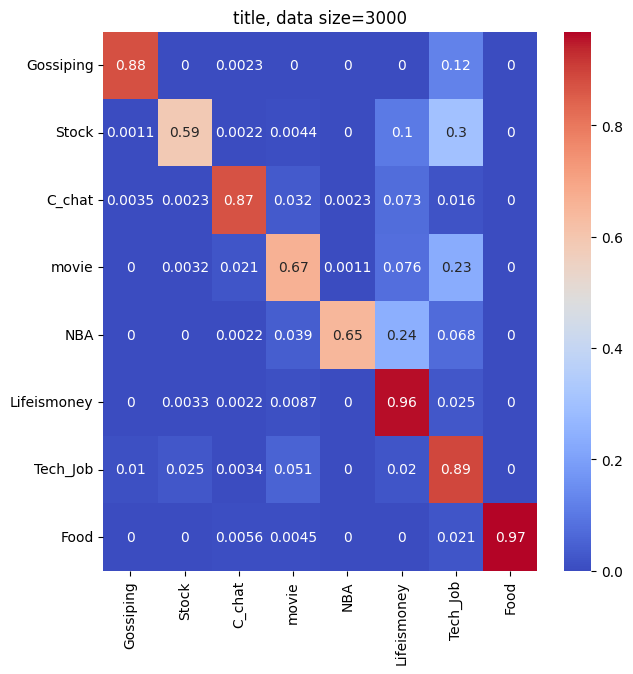

In [81]:
import seaborn as sns

persent_title = {
    outer_key: {inner_key: value / sum(inner_dict.values()) for inner_key, value in inner_dict.items()}
    for outer_key, inner_dict in count_title.items()
}
df_title = pd.DataFrame(persent_title).T
plt.figure(figsize=(7, 7))
sns.heatmap(df_title, annot=True, cmap='coolwarm', cbar=True)
plt.title('title, data size=3000')
plt.show()

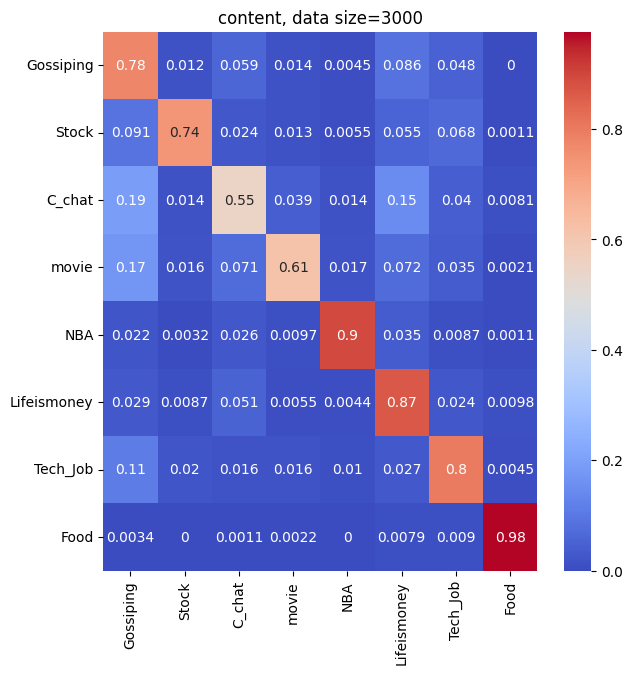

In [84]:
persent_content = {
    outer_key: {inner_key: value / sum(inner_dict.values()) for inner_key, value in inner_dict.items()}
    for outer_key, inner_dict in count_content.items()
}
df_content = pd.DataFrame(persent_content).T
plt.figure(figsize=(7, 7))
sns.heatmap(df_content, annot=True, cmap='coolwarm', cbar=True)
plt.title('content, data size=3000')
plt.show()

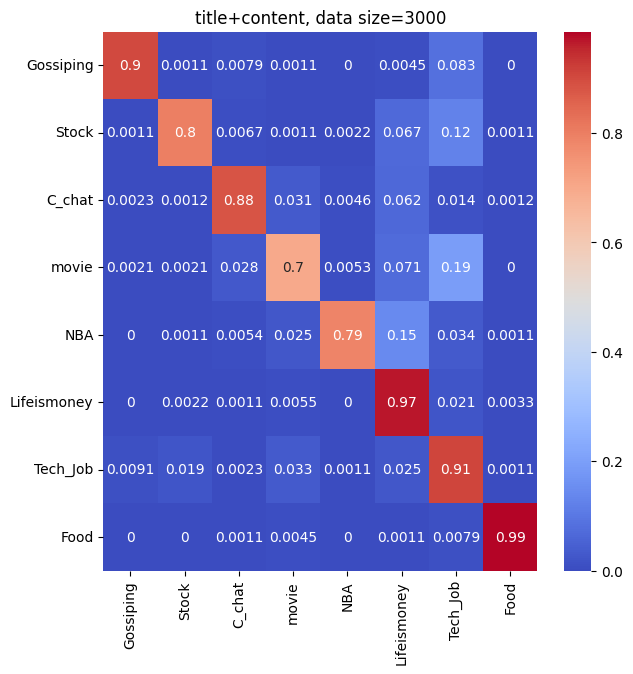

In [83]:
persent_content_title = {
    outer_key: {inner_key: value / sum(inner_dict.values()) for inner_key, value in inner_dict.items()}
    for outer_key, inner_dict in count_content_title.items()
}
df_content_title = pd.DataFrame(persent_content_title).T
plt.figure(figsize=(7, 7))
sns.heatmap(df_content_title, annot=True, cmap='coolwarm', cbar=True)
plt.title('title+content, data size=3000')
plt.show()